In [51]:
VERSION

v"1.6.7"

In [52]:
using Pkg
Pkg.activate("/Users/spielman/Lap7/")

  Activating new environment at `/Users/spielman/Lap7/Project.toml`


In [4]:
# import Pkg; Pkg.add("PlotlyJS")

In [5]:
# using PlotlyJS

In [53]:
using PyPlot
using Plots
using SparseArrays
using Random
using LinearAlgebra
using Statistics
using Arpack
using SparseArrays
using Laplacians

In [54]:
using DelimitedFiles
ijv = readdlm("/home/sumaiya/Desktop/Datasets/wiki_oc/wikipedia_link_oc_ijv")
# seperate i and j
ijv = convert(Matrix{Int64}, ijv);

In [55]:

i = ijv[:,1]
j = ijv[:,2]

n = i[1]
e = j[1]

i = i[2:e+1]
j = j[2:e+1]


loops = Vector{UInt64}()
for index in (length(i))
   if i[index] == j[index]
        append!(loops, index)
   end
end

i = [i; j]
j = [j; i[1:e]]



v = ones(2e,1)
v = v[:,1]
# v = convert(Vector{Int64}, v)
a = sparse(i,j,v)
for index in loops
    a[index, index] = 0
end
a = sparse(a);
#match no of non zero enteries with row_ptr[n+1] in csr_conversion
# print(a)

In [56]:
la = lap(a)

96201×96201 SparseMatrixCSC{Float64, Int64} with 29369457 stored entries:
⣿⣿⣿⣿⣿⣿⣿⣿⣟⣻⣿⣻⢿⣿⣻⣿⣿⣿⣿⣿⣿⢻⣿⣿⣿⣿⣻⣿⣿⣿⣿⡏⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡗⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣹⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣻⣿⣹⣟⣿⣿⣻⢽⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣻⣿⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢻⣿⢹⣿⣿⣿⣻⣾⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣷⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢾⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣹⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡷⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣛⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣛⣿⣿⣿⣿⣿⣿⣟⣻⣟⣛⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣻⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣾⣿⣿⣿⣿⣿⣿⣷⣷⣾⣿⣾⣷⣷⣾⣿⣿⣿⣿⣿⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣇⣿⣿⣿⣿⣿⣿⣿⣿
⡿⠿⠿⠿⢿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⢿⡿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⠿⢿⠿⢇⠿⠿⠿⠿⠿⠿⠿⠿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⣿⣿⣿⣿⣿⣿⣿⣿

# checking the degree of graph
## and creating the b

In [57]:
# degree_to_save = diag(la) # to save actual degree dist
degree_to_save = collect(la[:,4705])  #to save the degree of ith vertex
FileIOStream =  open("/home/sumaiya/Desktop/Datasets/wiki_oc/degree_4705.txt","w")
writedlm(FileIOStream, transpose(degree_to_save), "    ")
close(FileIOStream)

# print((degree_to_save))

In [20]:
sum_degree = 0
max_degree = 0
max_degree_index = -1


degree_list = Vector{UInt64}()

for i in 1:n
    sum_degree = sum_degree + la[i,i]
    append!(degree_list, la[i,i])

    if la[i,i] > max_degree
        max_degree = la[i,i]
        max_degree_index = i
    end

end

max_degree


81238.0

In [27]:
# size(degree_list)
println.(degree_list_sorted[48160])

346


In [39]:
?histogram

search: histogram histogram! histogram2d histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins::Union{Integer, Symbol, Tuple{Integer, Integer},          AbstractVector{T} where T}`: Default is :auto (the Freedman-Diaconis          rule). For histogram-types, defines the approximate          number of bins to aim for, or the auto-binning algorithm          to use (:sturges, :sqrt, :rice, :scott or :fd). For          fine-grained control pass a Vector of break values, e.g.          `range(minimum(x), stop = maximum(x), length = 25)`. Aliases: (:bin,          :nb, :nbin, :nbins).
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize::Union{Bool, Symbol}`: Histogram normalization               mode. Possible values are: false/:none (no               normalization, default), true/:pdf (normalize to a discrete               PDF, where the total area of the bins is 1),               :probability (bin heights sum to 1) and :density (the area               of each bin, rather than the height, is equal to               the counts - useful for uneven bin sizes).               Aliases: (:norm, :normalized, :normalizes, :normed).
  * `bar_position::Symbol`: Choose from `:overlay` (default),                  `:stack`. (warning: may only be partially                  implemented). Aliases: (:bar_positions, :barpositions).
  * `bar_width::Real`:  Width of bars in data coordinates. When               `nothing`, chooses based on `x` (or `y` when               `orientation = :h`). Aliases: (:bar_widths, :barwidths).
  * `bar_edges::Bool`: Align bars to edges (true), or centers               (the default) ?.
  * `permute::Tuple{Symbol, Symbol}`: Permutes data and axis             properties of the axes given in the tuple, e.g. (:x, :y).             Aliases: (:permutes,).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
julia> histogram([1,2,1,1,4,3,8],bins=0:8,weights=weights([4,7,3,9,12,2,6]))
```


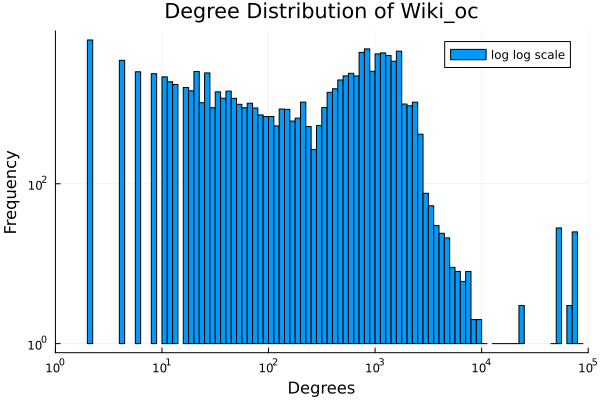

In [74]:
degree_list_sorted = sort(degree_list, rev=true)
binn = 10.0 .^ (0:0.05:5)
histogram(degree_list_sorted, bins=binn, xscale=:log10, yscale=:log10, xlim=extrema(binn),title="Degree Distribution of Wiki_oc", label= "log log scale", xlabel = "Degrees", ylabel = "Frequency" )
# histogram(degree_list_sorted[1:400]) # removing the highest degree vertex [2:14229]
# histogram(degree_list_sorted, title="Bar")
# histogram(degree_list_sorted[200:1000], title="Middle half of sorted degrees [200:1000]", label= "[200:1000]", xlabel = "Degrees", ylabel = "Frequency")

# stephist(degree_list_sorted, title="Step")

# title!("Normalized 2D Histogram")
# # xlabel!("x")
# ylabel!("y")

In [155]:
#hit and trial 
# middle = UInt(ceil(96201/8))
# padding = 100
# for (index, i) in enumerate(degree_list_sorted[middle-padding:middle+padding])
#     print(index , ":",  i, "\n")

# end

sink_index_in_above_loop = 23

sink_index = middle - padding + sink_index_in_above_loop
print("no of source: ", sink_index-2, "\t source degree threshold:" ,degree_list_sorted[sink_index-2], "\n") #set sink_index-2 as no of sources (no of source, source degree threshold)
print("sink_degree: ",degree_list_sorted[sink_index-1], "\n") 
print(degree_list_sorted[sink_index], "\n")
print(degree_list_sorted[sink_index+1], "\n")
print(degree_list_sorted[sink_index+2], "\n")




no of source: 11947	 source degree threshold:1366
sink_degree: 1364
1364
1364
1364


In [156]:

# 6.7
source_degree_threshold = 1366
no_of_sources = 11947
sink_degree = 1364

1364

In [157]:
b = Vector{Int64}()
is_sink_node_set = false

    
for i in 1:n
    if ((degree_list[i] == sink_degree) & (!is_sink_node_set))
        append!(b, -no_of_sources )
        is_sink_node_set = true
    elseif (degree_list[i]<source_degree_threshold)
        append!(b, 0)
    else
        append!(b, 1)
    end
    
end

In [145]:
# Much simpler b creation for sink with max degree
b = Vector{Int64}()

frac_of_sources = 0.25
no_of_sources = UInt(ceil(96201*frac_of_sources))
print.(no_of_sources)

degree_theshold = degree_list_sorted[no_of_sources]

for i in 1:n
    if (degree_list[i] < degree_theshold)
        append!(b, 0)
    else
        append!(b, 1)
    end
    
end

# set the sink as max_degree_vertex
sink_b = -sum(b)+1
b[max_degree_index] = sink_b
actual_frac_of_sources = -sink_b/96201


24051

0.2500389808837746

In [158]:
sum(b) #should be zero

0

In [159]:
sort(b)

96201-element Vector{Int64}:
 -11947
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0
      ⋮
      1
      1
      1
      1
      1
      1
      1
      1
      1
      1
      1
      1

In [41]:
#beware run only once :O
# b = b ./ no_of_sources

In [160]:
# Now get unnormalized b after verification
b = Vector{Int64}()

is_sink_node_set = false

    
for i in 1:n
    if ((degree_list[i] == sink_degree) & (!is_sink_node_set))
        append!(b, -no_of_sources )
        print("setting sink nodes as :", i, " which has degree ", degree_list[i])
        is_sink_node_set = true
    elseif (degree_list[i]<source_degree_threshold)
        append!(b, 0)
    else
        append!(b, 1)
    end
    
end

setting sink nodes as :5919 which has degree 1364

In [161]:
# save b for the csr representation (chnage the name)

FileIOStream =  open("/home/sumaiya/Desktop/Datasets/wiki_oc/bug_12_b.txt","a")
writedlm(FileIOStream, transpose(b), "    ")
close(FileIOStream)
